<a href="https://colab.research.google.com/github/GillValenzuela/curso_data_science/blob/master/DS_Ingemat_Clase_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [3]:
from sklearn.pipeline import Pipeline

In [4]:
pipe_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(30, 10),
                          max_iter=1000,
                          random_state=42,
                          solver = 'adam',
                          activation='relu'))
])

In [6]:
pipe_mlp.fit(X_train, y_train)
y_pred_mlp = pipe_mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

[[41  1]
 [ 3 69]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [7]:
!pip install -q interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 11.1 MB/s eta 0:00:00


In [8]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

In [9]:
feature_names = data.feature_names

In [10]:
ebm = ExplainableBoostingClassifier(feature_names=feature_names, random_state=42)
ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(feature_names=array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [11]:
pred_ebm = ebm.predict(X_test)
print(confusion_matrix(y_test, pred_ebm))
print(classification_report(y_test, pred_ebm))

[[38  4]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [12]:
ebm_global = ebm.explain_global(name="EBM Breast Cancer (con nombres)")
show(ebm_global)

In [13]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
sns.set(style="whitegrid")

In [38]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

In [24]:
kmeans_pipes  = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=5, random_state=0))
])

In [25]:
kmeans_labels = kmeans_pipes.fit_predict(X)

In [18]:
kmeans_labels

array([3, 3, 0, 1, 3, 1, 2, 1, 0, 2, 0, 2, 0, 0, 3, 0, 3, 2, 0, 0, 2, 0,
       1, 3, 0, 3, 3, 1, 1, 2, 0, 2, 3, 2, 3, 0, 3, 1, 3, 1, 2, 0, 3, 1,
       0, 0, 3, 2, 3, 2, 1, 3, 1, 0, 1, 2, 3, 2, 2, 0, 3, 2, 2, 3, 1, 1,
       1, 1, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 0, 1, 0, 0, 3, 0, 1, 3, 3, 2,
       2, 2, 3, 0, 3, 0, 0, 3, 1, 0, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 1, 3,
       2, 0, 0, 0, 0, 2, 3, 1, 3, 1, 1, 1, 0, 3, 1, 3, 3, 0, 3, 1, 2, 0,
       0, 0, 0, 2, 2, 3, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 3, 2, 1,
       0, 2, 1, 3, 3, 2, 0, 3, 1, 3, 2, 3, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 3, 0, 3, 2, 2, 3, 1, 0, 2, 2, 1, 1, 1, 3, 2, 1, 1, 2,
       2, 3, 0, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 1, 1, 2, 3, 1, 3, 3, 0, 3,
       3, 1, 3, 1, 2, 2, 3, 3, 2, 2, 2, 3, 0, 1, 2, 1, 3, 2, 3, 3, 3, 1,
       1, 2, 3, 1, 1, 1, 3, 1, 3, 1, 3, 2, 1, 3, 2, 0, 3, 0, 2, 0, 3, 0,
       1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 3, 3, 1, 0, 0, 2, 2, 2, 2, 1, 3, 2,
       1, 2, 2, 1, 0, 1, 2, 0, 3, 0, 2, 0, 3, 3], d

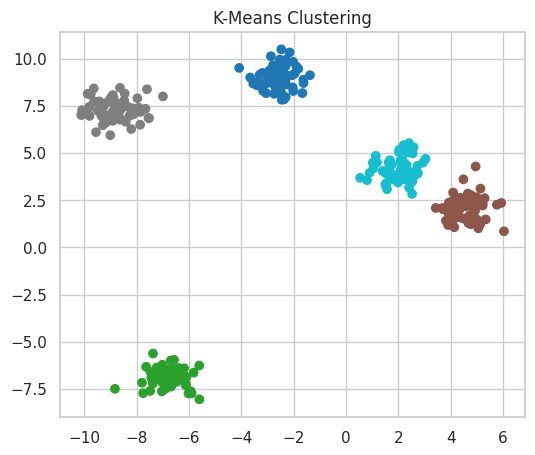

In [26]:
plt.figure(figsize=(6, 5))
plt.title("K-Means Clustering")
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='tab10')
plt.show()

In [45]:
pipe_dbscan = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.3, min_samples=2))
])

In [46]:
dbscan_labels = pipe_dbscan.fit_predict(X)

In [32]:
dbscan_labels

array([0, 1, 0, 1, 0, 2, 1, 3, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 3, 1, 1, 3, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1, 0, 1, 3, 2,
       1, 2, 0, 3, 1, 3, 2, 1, 3, 2, 0, 2, 1, 0, 2, 3, 0, 2, 1, 1, 3, 1,
       3, 3, 3, 3, 1, 3, 2, 1, 2, 0, 2, 2, 1, 0, 3, 0, 0, 1, 0, 3, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 3, 0, 0, 0, 1, 0, 1,
       2, 1, 1, 1, 0, 0, 0, 3, 2, 2, 2, 3, 2, 2, 0, 3, 1, 1, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 1, 3, 1, 0, 2, 0, 1, 1, 0, 1, 3, 1, 3, 1, 3, 3, 1,
       0, 1, 3, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 3, 0, 1, 1, 0, 1,
       2, 1, 3, 3, 2, 2, 1, 3, 3, 1, 0, 2, 3, 1, 1, 3, 0, 3, 3, 2, 2, 3,
       1, 1, 2, 3, 1, 1, 2, 0, 0, 3, 3, 0, 3, 2, 1, 3, 0, 1, 2, 2, 3, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 1,
       3, 1, 3, 2, 1, 1, 3, 3, 1, 1, 2, 3, 2, 1, 3, 1, 3, 1, 3, 0, 1, 1,
       1, 0, 1, 1, 3, 1, 2, 3, 3, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1, 3,
       3, 3, 1, 1, 2, 1, 3, 2, 0, 2, 3, 0, 1, 0])

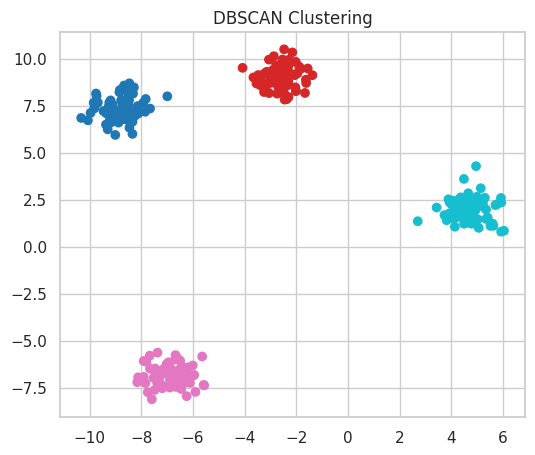

In [47]:
plt.figure(figsize=(6, 5))
plt.title("DBSCAN Clustering")
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='tab10')
plt.show()